In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
dataset=pd.read_csv("loan.csv")

In [3]:
dataset.shape

(12, 10)

In [4]:
dataset.describe()

,loan_id,applicantincome,coapplicant_income,loan_amount
count,11.000000,9.000000e+00,12.000000,11.000000
mean,103.272727,4.210732e+05,22268.833333,168.727273
std,222.016707,1.084992e+06,66468.316177,146.589966
min,5.000000,4.000000e+00,0.000000,2.000000
25%,12.000000,2.320000e+02,177.000000,32.000000
50%,34.000000,4.545000e+03,398.500000,232.000000
75%,71.500000,3.409400e+04,3436.750000,323.000000
max,767.000000,3.287328e+06,232323.000000,323.000000


In [5]:
dataset.isnull().sum()

loan_id               1
Gender                4
Married               4
Dependents            2
Education             7
self_employed         3
applicantincome       3
coapplicant_income    0
loan_amount           1
property              1
dtype: int64

In [6]:
dataset.fillna({"applicantincome":dataset["applicantincome"].mode()[0]},inplace =True)

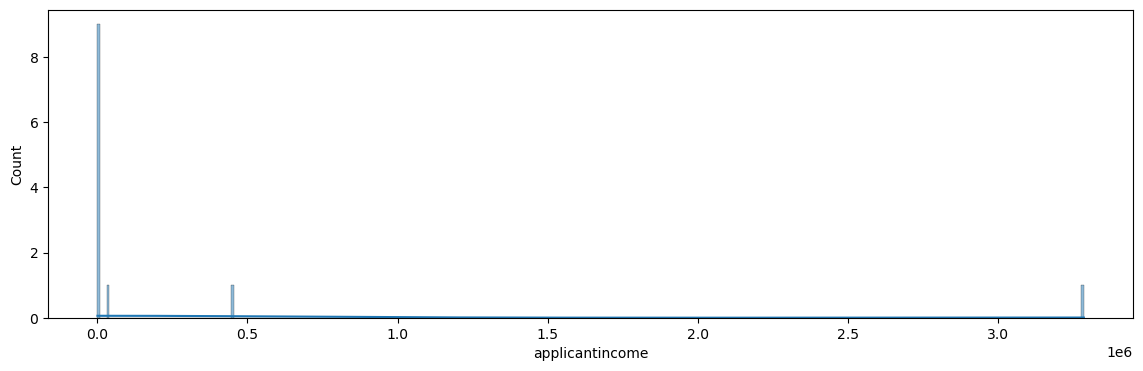

In [7]:
plt.figure(figsize=(14,4))

sns.histplot(dataset["applicantincome"],kde=True)
plt.show()

In [8]:
Q1=dataset["applicantincome"].quantile(0.25)
Q3=dataset["applicantincome"].quantile(0.75)
IQR=Q3-Q1

In [9]:
mean_value=Q1-(1.5*IQR)
max_value=Q3+(1.5*IQR)
mean_value,max_value

(np.float64(-10232.75), np.float64(26299.25))

In [10]:
dataset=dataset[dataset["applicantincome"]<=max_value]

In [11]:
dataset.shape

(9, 10)

In [ ]:
plt.figure(figsize=(14,4))

sns.histplot(dataset["applicantincome"],kde=True)
plt.show()

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [9]:
ft=FunctionTransformer(func=np.log1p)  
ft.fit(dataset[["applicantincome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [10]:
dataset["applicantincome_ft"]=ft.transform(dataset[["applicantincome"]])

In [11]:
dataset

,loan_id,Gender,Married,Dependents,Education,self_employed,applicantincome,coapplicant_income,loan_amount,property,applicantincome_ft
0,12.0,male,no,0,graduate,no,453453.0,0,232.0,urban,13.024649
1,34.0,female,yes,1,NaN,yes,5435.0,3434,232.0,rural,8.600799
2,5.0,male,NaN,2,ungraduate,NaN,4545.0,3,32.0,rural,8.422003
3,65.0,NaN,no,3+,NaN,no,4545.0,3434,2.0,urban,8.422003
4,767.0,female,yes,2,graduate,NaN,23.0,3445,323.0,rural,3.178054
5,8.0,NaN,NaN,NaN,NaN,yes,4545.0,454,2.0,urban,8.422003
6,78.0,female,NaN,1,ungraduate,NaN,4545.0,343,32.0,rural,8.422003
7,NaN,male,yes,0,NaN,yes,4545.0,23223,32.0,urban,8.422003
8,89.0,male,no,NaN,NaN,no,34094.0,323,NaN,rural,10.436906
9,34.0,NaN,no,1,NaN,no,232.0,232,323.0,rural,5.451038


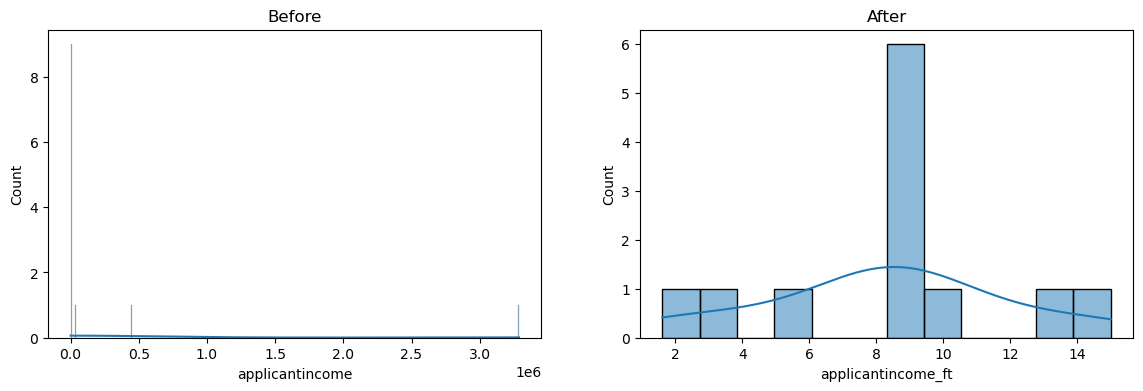

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataset["applicantincome"],kde=True)
plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataset["applicantincome_ft"] , kde=True)
plt.show()

In [10]:
# sqaure function k lie phle lemda lgae 
ft1=FunctionTransformer(func=lambda x:x**2)
ft1.fit(dataset[["applicantincome"]])


FunctionTransformer(func=<function <lambda> at 0x000001CEBDF45760>)

In [11]:
dataset["applicantincome_tf1"]=ft1.transform(dataset["applicantincome"])

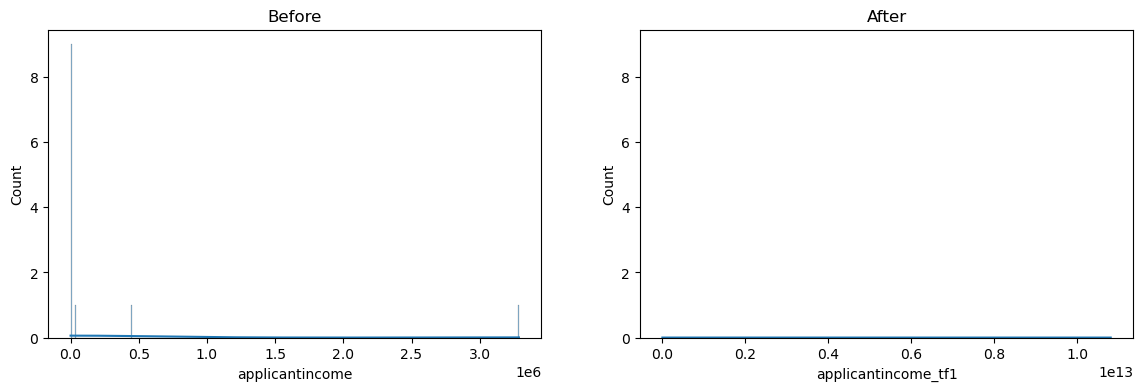

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataset["applicantincome"],kde=True)
plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataset["applicantincome_tf1"] , kde=True)
plt.show()